In [1]:
import gym
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
env = gym.make("Taxi-v2")
env.reset()
env.render()

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [4]:
env.action_space.n

6

In [8]:
env.step(1)
env.render()

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)


## TD-Control

## Q-Learning

In [21]:
alpha = 0.4
gamma = 0.9
epsilon = 0.02
episodes = 5000

Q = np.zeros((env.observation_space.n, env.action_space.n))
total_rewards = np.zeros(episodes)

In [7]:
def epsilon_greedy_policy(state, epsilon):
    if random.uniform(0,1) < epsilon:
        return env.action_space.sample()
    else:
        return max(list(range(env.action_space.n)), key = lambda x: Q[state][x])

In [23]:
for i in range(episodes):
    state = env.reset()
    
    while True:
        action = epsilon_greedy_policy(state, epsilon)
        state_next, reward, done, _ = env.step(action)
        
        q_max = max([ Q[state_next][a] for a in range(env.action_space.n) ])
        Q[state][action] += alpha * (reward + gamma * q_max - Q[state][action])
        
        state = state_next
        total_rewards[i] += reward
        
        if done:
            break
            
    if i % 1000 == 0:
            print("{} episodes done.".format(i))

0 episodes done.
1000 episodes done.
2000 episodes done.
3000 episodes done.
4000 episodes done.


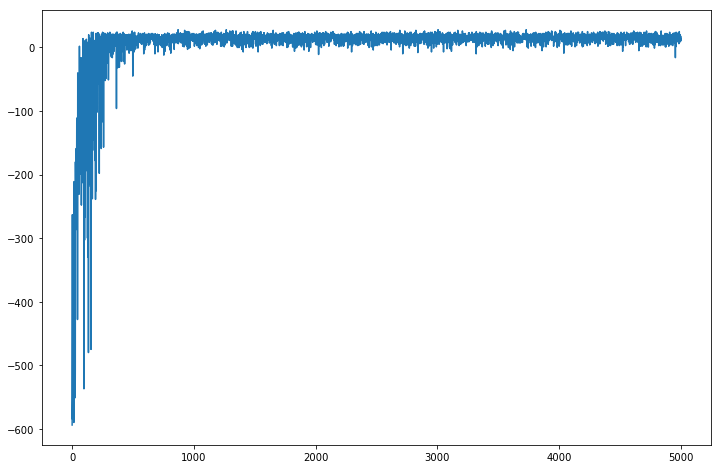

In [24]:
plt.figure(figsize=(12, 8))
plt.plot(range(episodes), total_rewards)

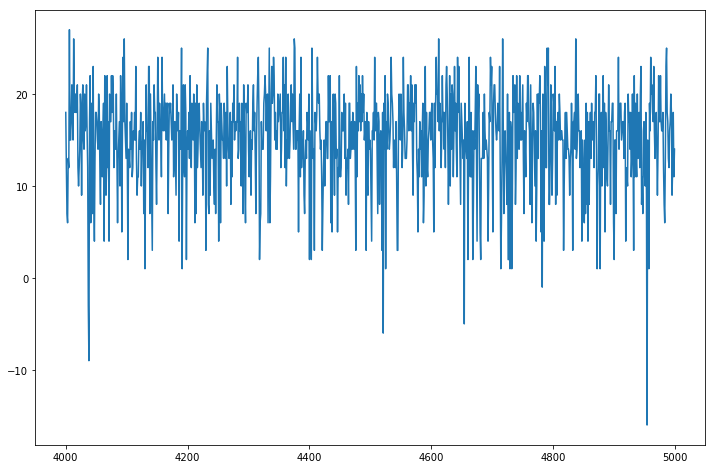

In [25]:
plt.figure(figsize=(12, 8))
plt.plot(range(4000, episodes), total_rewards[4000:])

## SARSA

In [39]:
alpha = 0.4
gamma = 0.9
epsilon = 0.05
episodes = 5000

Q = np.zeros((env.observation_space.n, env.action_space.n))
total_rewards = np.zeros(episodes)

In [40]:
for i in range(episodes):
    state = env.reset()
    action = epsilon_greedy_policy(state, epsilon)
    
    while True:
        state_next, reward, done, _ = env.step(action)
        action_next = epsilon_greedy_policy(state_next, epsilon)
        
        Q[state][action] += alpha*(reward + gamma*Q[state_next][action_next] - Q[state][action])
        
        state = state_next
        action = action_next
        total_rewards[i] += reward
        
        if done:
            break
    
    if i%1000 == 0:
        print("{} episodes done.".format(i))

0 episodes done.
1000 episodes done.
2000 episodes done.
3000 episodes done.
4000 episodes done.


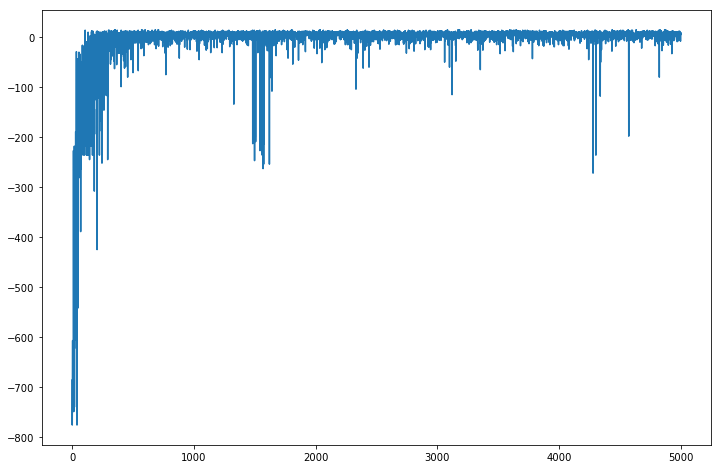

In [41]:
plt.figure(figsize=(12, 8))
plt.plot(range(episodes), total_rewards)

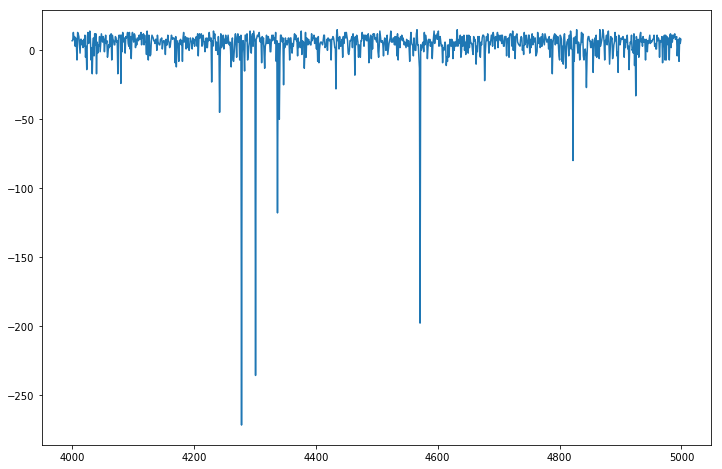

In [42]:
plt.figure(figsize=(12, 8))
plt.plot(range(4000, episodes), total_rewards[4000:])

In [43]:
env.close()